In [5]:
library(rtweet)
library(igraph)

In [6]:
## get status IDs of jack's friend's
fds <- get_friends("jack")
head(fds)

user,user_id
jack,10754282
jack,226933619
jack,11626052
jack,16684243
jack,26258904
jack,877806996329611264


In [7]:
## user (user) and user_id (friends)
head(fds, 10)

user,user_id
jack,10754282
jack,226933619
jack,11626052
jack,16684243
jack,26258904
jack,877806996329611264
jack,902926941413453824
jack,1394944982
jack,183803512
jack,4658336942


In [8]:
jackyFriends <- get_friends("iamdatabear")
head(jackyFriends)

user,user_id
iamdatabear,160162994
iamdatabear,79773983
iamdatabear,124413684
iamdatabear,24923980
iamdatabear,1285286270
iamdatabear,916226251


In [9]:
## get frieds of data scientists
fds <- get_friends(c("hadleywickham", "hrbrmstr", "calbon", "dataandme", "rOpenSci", "jack", "NateSilver538"))

1 friend networks collected!
2 friend networks collected!
3 friend networks collected!
4 friend networks collected!
5 friend networks collected!
6 friend networks collected!
7 friend networks collected!


In [10]:
## frequency count of accounts followed by the users queried above
tbl <- table(fds$user_id)

head(tbl, 5)


   1000591   10012402  100224999 1002323377    1002351 
         1          1          1          1          1 

In [11]:
## identify all accounts followed by at least 3 of the queried users
fds_mult <- names(tbl[tbl > 3L])

head(fds_mult)

# JACKY: 
# this means that these accounts were followed by at least 3 of those data scientists! 
# they must be pretty important

[1] "103693215"  "1237502864" "128275616"  "13074042"   "152862026" 
[6] "16047639"

In [12]:
## use the `lookup_users()` function to get more data on the users (e.g., screen names)
fds_mult_df <- lookup_users(fds_mult)

head(fds_mult_df, 2)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
103693215,Kevin Ushey,kevin_ushey,,,https://t.co/qpA6XrbghR,FALSE,1456,667,111,2410,14178,2010-01-10 23:16:46,FALSE,https://t.co/qpA6XrbghR,http://kevinushey.github.io,en,https://pbs.twimg.com/profile_banners/103693215/1403384070,http://pbs.twimg.com/profile_background_images/750106033/09a025a960bf85eb6ca67b442710ac79.jpeg,http://pbs.twimg.com/profile_images/854548721106788354/MiANiQjR_normal.jpg
1237502864,Karl Broman,kwbroman,"Madison, Wisconsin","statistician; professor at UW-Madison; genetics and genomics, open science, programming, interactive data visualization",http://t.co/ohSgLOhLcc,FALSE,8424,612,434,14548,22955,2013-03-03 02:59:38,FALSE,http://t.co/ohSgLOhLcc,http://kbroman.org,en,https://pbs.twimg.com/profile_banners/1237502864/1430357642,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/680796333460959232/CzoFZb76_normal.jpg


In [13]:
## subset fds data to only those followed by 3 or more
fds3 <- subset(fds, user_id %in% fds_mult)

tail(fds3, 10)

user,user_id
rOpenSci,18463930
rOpenSci,39010299
rOpenSci,374659701
rOpenSci,267256091
jack,152862026
jack,2384071
NateSilver538,782325
NateSilver538,152862026
NateSilver538,43593
NateSilver538,2384071


In [14]:
## convert fds3 to matrix
mat <- as.matrix(fds3)

tail(mat)

,user,user_id
"[111,]",jack,152862026
"[112,]",jack,2384071
"[113,]",NateSilver538,782325
"[114,]",NateSilver538,152862026
"[115,]",NateSilver538,43593
"[116,]",NateSilver538,2384071


In [15]:
match(fds3$user_id, fds_mult_df$user_id)

# JACKY: The match() function returns a vector of the 
# position of first occurrence of the vector1 in vector2. 
# If the element of the vector1 does not exist 
# in vector2, NA is returned.

[1] 29  8 14 22  4 10 17 25 27 24  6 16 28 11  2  3 13 15  1  9 26 20 21 19 23
 [26]  7 18  8 14 28  2 17 22 25  4 13 24 16 15  3 26  9 29 10  6 21  1 11 19 27
 [51]  7 20 18 23 28 17 22  7 19 20 16 14 25  8 27  1 11  5  3 13  9 21 26  4 10
 [76] 29 15  6  2 18 24 12 17  6 20 11 24  4 25 18 27 14 22  8  2  3 16  1 26 29
[101]  9 10 15  5 23 12  7 21 19 13  5 12 28  5 23 12

In [16]:
fds_mult_df[29, c("user_id", "screen_name")]

user_id,screen_name
97582853,noamross


In [17]:
fds_mult_df$screen_name[29]

[1] "noamross"

In [18]:
## replace user IDs with screen names
mat[, 2] <- fds_mult_df$screen_name[match(fds3$user_id, fds_mult_df$user_id)]

In [19]:
head(mat)

# JACKY: UserID is now the screenname instead of the ID number

user,user_id
hadleywickham,noamross
hadleywickham,LucyStats
hadleywickham,seankross
hadleywickham,gbwanderson
hadleywickham,juliasilge
hadleywickham,JennyBryan


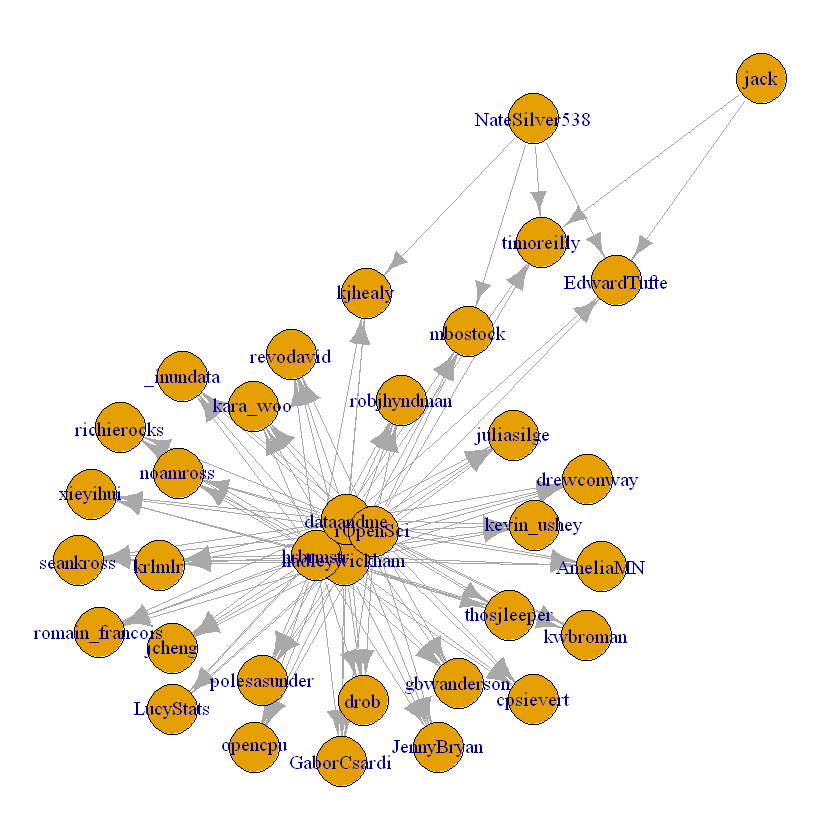

In [20]:
## convert to graph object
mat <- igraph::graph_from_edgelist(mat)

## plot network
par(mar = c(1, 1, 1, 1))
plot(mat)

In [21]:
trump_fds <- get_friends("realdonaldtrump")

In [22]:
## initialize output vector
trump_fds_fds <- vector("list", nrow(trump_fds))

In [23]:
nrow(trump_fds)

[1] 45

In [ ]:
## for loop with sleep in it
for (i in seq_along(trump_fds_fds)) {
    print(paste("Retrieving", i))
    # get the list of trump's friend's friends
    trump_fds_fds[[i]] <- get_friends(trump_fds$user_id[i])
    
    
    
    ## sleep every 15 calls for 15 minutes (but never on the last call)
    if (i %% 15 == 0 && i != length(trump_fds_fds)) {
        Sys.sleep(60 * 15)
    }
}

[1] "Retrieving 1"
[1] "Retrieving 2"
[1] "Retrieving 3"
[1] "Retrieving 4"
[1] "Retrieving 5"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 6"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 7"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 8"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 9"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 10"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 11"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 12"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 13"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 14"


Warning message:
"Rate limit exceeded"

[1] "Retrieving 15"


Warning message:
"Rate limit exceeded"

In [ ]:
## combine in single data frame
trump_fds_fds <- do.call("rbind", trump_fds_fds)

In [ ]:
kmw <- get_followers("kearneymw")

In [ ]:
head(kmw, 10)

In [ ]:
## get all of trump's followers
rdt <- get_followers("realdonaldtrump", n = 5e7)

In [ ]:
## initialize parameter (start at NULL and update once we have some data)
page <- NULL

## initialize output vector (change 2 to a lot larger number for more followers)
out <- vector("list", 2)

## create output data directory
dir.create("rdt-followers")

In [ ]:
## loop through followers, sleeping after every call
for (i in seq_along(out)) {
    
    ## get followers
    out[[i]] <- get_followers("realdonaldtrump", n = 75000, page = page)
    
    ## save file
    saveRDS(out[[i]], paste0("rdt-followers/rdt", i, ".rds"))
    
    ## update cursor param
    page <- next_cursor(out[[i]])
    
    ## break if cursor is null or if last loop
    if (is.null(page) || i == length(out)) {
        break
        
    }
    
    ## sleep with message
    message("Waiting 15 mins for rate limit reset...")
    Sys.sleep(60 * 15)
}

In [ ]:
## list all RDS (R data) files in data directory
files <- list.files("rdt-followers", full.names = TRUE, pattern = "\\.rds$")

In [ ]:
## initailize output vector
rdt <- lapply(files, readRDS)

In [ ]:
## collapse into single data frame
rdt <- do.call("rbind", rdt)

In [ ]:
rdt